In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wf_hvar = pd.read_csv("/hpc/umc_laat/gvandersluis/data/Ont_data_nhung/HG002/wf_hvar_ROI/Haploblock_switches.csv")
#v5_0_old = v5_0_old.drop("GENES_in_HB", axis=1)

wf_hvar['Accuracy_float'] = (
    wf_hvar['Accuracy']
    .str.rstrip('%')
    .astype(float)/100
)

wf_hvar['flip_amount'] = pd.to_numeric(
    wf_hvar['all_switchflips'].str.split('/').str[1],
    errors='coerce'
)
wf_hvar['switch_amount'] = pd.to_numeric(
    wf_hvar['all_switchflips'].str.split('/').str[0],
    errors='coerce'
)

wf_hvar["flip_amount"].sum()

np.float64(506.0)

In [3]:
wf_hvar

,PS_R,START_HB,END_HB,phased_variants,chromosome,GQ_mean,HB_length,total_VARS,PS_tag,het_variants0,all_switches,all_switch_rate,all_switchflips,all_switchflip_rate,blockwise_hamming_rate,Accuracy,Accuracy_float,flip_amount,switch_amount
0,48414581,49300603,49300603,1,chr22,44.000000,0,1,chr22_48414581,1.0,0.0,NaN,0/0,NaN,NaN,nan%,NaN,0.0,0.0
1,chr10_100030138,100030138,100092179,6,chr10,30.833333,62041,110,chr10_chr10_100030138,2.0,0.0,0.0,0/0,0.0,0.0,100.0%,1.0,0.0,0.0
2,chr10_100140109,100127172,101751973,1484,chr10,47.721698,1624801,2445,chr10_chr10_100140109,1285.0,0.0,0.0,0/0,0.0,0.0,100.0%,1.0,0.0,0.0
3,chr10_101790524,101770141,102457835,310,chr10,47.070968,687694,559,chr10_chr10_101790524,279.0,0.0,0.0,0/0,0.0,0.0,100.0%,1.0,0.0,0.0
4,chr10_102503756,102503756,103822548,1246,chr10,50.865169,1318792,1946,chr10_chr10_102503756,1160.0,0.0,0.0,0/0,0.0,0.0,100.0%,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,chrY_9055695,9055695,9057587,140,chrY,31.935714,1892,140,chrY_chrY_9055695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3974,chrY_9107650,9107650,9109819,93,chrY,29.010753,2169,93,chrY_chrY_9107650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3975,chrY_9336595,9336595,9403472,176,chrY,18.755682,66877,229,chrY_chrY_9336595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3976,chrY_9454189,9454189,9537326,239,chrY,16.146444,83137,326,chrY_chrY_9454189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
wf_hvar["flip_amount"].sum()

np.float64(506.0)

In [13]:
wf_hvar["switch_amount"].sum()

np.float64(175.0)

In [16]:
v5_0_new["flip_amount"].sum()

np.float64(506.0)

In [15]:
v5_0_new["switch_amount"].sum()

np.float64(177.0)

In [14]:
v5_0_new = pd.read_csv("/hpc/umc_laat/gvandersluis/data/Ont_data_nhung/HG002/WF_H_VAR_ROI/Haploblock_switches.csv").drop("GENES_in_HB", axis=1)
v5_0_new['Accuracy_float'] = (
    v5_0_new['Accuracy']
    .str.rstrip('%')
    .astype(float)*100
)
v5_0_new['flip_amount'] = pd.to_numeric(
    v5_0_new['all_switchflips'].str.split('/').str[1],
    errors='coerce'
)
v5_0_new['switch_amount'] = pd.to_numeric(
    v5_0_new['all_switchflips'].str.split('/').str[0],
    errors='coerce'
)


In [2]:
v5_0_old = pd.read_csv("/hpc/umc_laat/gvandersluis/data/Ont_data_nhung/HG002/OMIM_ROI/Haploblock_switches.csv").drop("GENES_in_HB", axis=1)
#v5_0_old = v5_0_old.drop("GENES_in_HB", axis=1)

v5_0_old['Accuracy_float'] = (
    v5_0_old['Accuracy']
    .str.rstrip('%')
    .astype(float)*100
)

v5_0_old['flip_amount'] = pd.to_numeric(
    v5_0_old['all_switchflips'].str.split('/').str[1],
    errors='coerce'
)
v5_0_old['switch_amount'] = pd.to_numeric(
    v5_0_old['all_switchflips'].str.split('/').str[0],
    errors='coerce'
)


v5_0_new = pd.read_csv("/hpc/umc_laat/gvandersluis/data/Ont_data_nhung/HG002/WF_H_VAR_ROI/Haploblock_switches.csv").drop("GENES_in_HB", axis=1)
v5_0_new['Accuracy_float'] = (
    v5_0_new['Accuracy']
    .str.rstrip('%')
    .astype(float)*100
)
v5_0_new['flip_amount'] = pd.to_numeric(
    v5_0_new['all_switchflips'].str.split('/').str[1],
    errors='coerce'
)
v5_0_new['switch_amount'] = pd.to_numeric(
    v5_0_new['all_switchflips'].str.split('/').str[0],
    errors='coerce'
)

v5_2_new = pd.read_csv("/hpc/umc_laat/gvandersluis/data/Ont_data_nhung/HG002/SUP_v5.2_ROI/Haploblock_switches.csv").drop("GENES_in_HB", axis=1)

v5_2_new['Accuracy_float'] = (
    v5_2_new['Accuracy']
    .str.rstrip('%')
    .astype(float)*100
)

v5_2_new['flip_amount'] = pd.to_numeric(
    v5_2_new['all_switchflips'].str.split('/').str[1],
    errors='coerce'
)
v5_2_new['switch_amount'] = pd.to_numeric(
    v5_2_new['all_switchflips'].str.split('/').str[0],
    errors='coerce'
)

In [3]:
v5_2_new

,PS,START_HB,END_HB,phased_variants,chromosome,GQ_mean,HB_length,total_VARS,PS_tag,het_variants0,all_switches,all_switch_rate,all_switchflips,all_switchflip_rate,blockwise_hamming_rate,Accuracy,Accuracy_float,flip_amount,switch_amount
0,100030138,100012227,100092179,5,chr10,30.400000,79952,133,chr10_100030138,3.0,0.0,0.00000,0/0,0.00000,0.000000,1.0%,100.000000,0.0,0.0
1,100086706,100086706,101360463,1804,chr7,44.917406,1273757,2452,chr7_100086706,940.0,2.0,0.00277,2/0,0.00277,0.020747,0.9792531120331951%,97.925311,0.0,2.0
2,100086896,100046415,100317041,152,chr4,52.546053,270626,207,chr4_100086896,120.0,0.0,0.00000,0/0,0.00000,0.000000,1.0%,100.000000,0.0,0.0
3,100100590,100079413,100133764,32,chr9,31.000000,54351,88,chr9_100100590,3.0,0.0,0.00000,0/0,0.00000,0.000000,1.0%,100.000000,0.0,0.0
4,100134403,100134403,100216833,9,chr13,49.111111,82430,39,chr13_100134403,9.0,0.0,0.00000,0/0,0.00000,0.000000,1.0%,100.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,99884557,99884557,99926758,5,chr4,37.600000,42201,5,chr4_99884557,3.0,0.0,0.00000,0/0,0.00000,0.000000,1.0%,100.000000,0.0,0.0
3431,99926797,99926797,100051178,10,chr7,51.400000,124381,141,chr7_99926797,7.0,0.0,0.00000,0/0,0.00000,0.000000,1.0%,100.000000,0.0,0.0
3432,99950376,99945658,100077908,35,chr13,45.085714,132250,204,chr13_99950376,30.0,0.0,0.00000,0/0,0.00000,0.000000,1.0%,100.000000,0.0,0.0
3433,99970670,99970670,99973046,2,chr4,61.500000,2376,2,chr4_99970670,2.0,0.0,0.00000,0/0,0.00000,0.000000,1.0%,100.000000,0.0,0.0


In [4]:
v5_2_new[["PS_tag", "START_HB", "END_HB", "HB_length", "phased_variants", "total_VARS", "GQ_mean", "het_variants0", "all_switches", "all_switchflips", "blockwise_hamming_rate"]].head(10)

,PS_tag,START_HB,END_HB,HB_length,phased_variants,total_VARS,GQ_mean,het_variants0,all_switches,all_switchflips,blockwise_hamming_rate
0,chr10_100030138,100012227,100092179,79952,5,133,30.400000,3.0,0.0,0/0,0.000000
1,chr7_100086706,100086706,101360463,1273757,1804,2452,44.917406,940.0,2.0,2/0,0.020747
2,chr4_100086896,100046415,100317041,270626,152,207,52.546053,120.0,0.0,0/0,0.000000
3,chr9_100100590,100079413,100133764,54351,32,88,31.000000,3.0,0.0,0/0,0.000000
4,chr13_100134403,100134403,100216833,82430,9,39,49.111111,9.0,0.0,0/0,0.000000
5,chr10_100140109,100127172,101751973,1624801,1501,2471,48.578947,1285.0,0.0,0/0,0.000000
6,chr7_10014843,10436239,11395522,959283,1338,2004,53.548580,1239.0,2.0,0/1,0.001211
7,chr2_100163792,100129382,100723600,594218,646,756,54.085139,617.0,0.0,0/0,0.000000
8,chr9_100186403,100185516,100239538,54022,4,4,50.250000,4.0,0.0,0/0,0.000000
9,chr13_100253234,100253234,100298708,45474,3,55,28.666667,1.0,0.0,0/0,NaN


In [5]:
v5_2_new[
    v5_2_new["all_switches"].isna() &
    ~v5_2_new["chromosome"].isin(["chrX", "chrY"])
].sort_values("HB_length").head(50)


,PS,START_HB,END_HB,phased_variants,chromosome,GQ_mean,HB_length,total_VARS,PS_tag,het_variants0,all_switches,all_switch_rate,all_switchflips,all_switchflip_rate,blockwise_hamming_rate,Accuracy,Accuracy_float,flip_amount,switch_amount
3407,98852115,98852113,98852117,3,chr10,15.333333,4,3,chr10_98852115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2674,67353367,67353362,67353371,5,chr15,14.400000,9,5,chr15_67353367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3360,96439188,96439226,96439238,2,chr10,12.500000,12,2,chr10_96439188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,111780312,111780303,111780321,4,chr3,16.000000,18,4,chr3_111780312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,120918415,120918411,120918447,5,chr8,18.600000,36,6,chr8_120918415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2947,7700479,7700479,7700544,2,chr8,9.500000,65,2,chr8_7700479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2532,61727,61727,61868,2,chr11,6.000000,141,2,chr11_61727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,18389677,18389677,18389833,2,chr16,10.500000,156,2,chr16_18389677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2264,51489451,51489451,51489766,4,chr4,2.500000,315,4,chr4_51489451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780,34445735,34445735,34446149,8,chr21,5.125000,414,13,chr21_34445735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


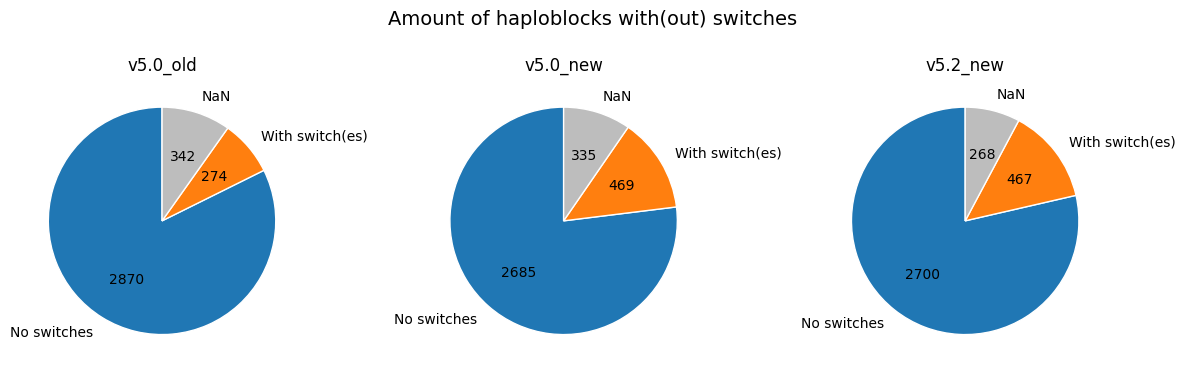

In [6]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

def autopct_counts(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{count}"
    return inner_autopct

def piecharts(ax, title, dataf):
    COLOR_MAP = {
    "With switch(es)": "#ff7f0f",
    "No switches": "#2077b4",
    "NaN": "#bdbdbd"
    }
    
    CATEGORY_ORDER = ["No switches","With switch(es)", "NaN"]

    pieplot = pd.DataFrame(index=dataf.index)

    pieplot["switch_status"] = np.where(
        dataf["all_switches"].isna(),
        "NaN",
        np.where(dataf["all_switches"] > 0, "With switch(es)", "No switches")
    )

    counts = pieplot["switch_status"].value_counts()
    counts = counts.reindex(CATEGORY_ORDER, fill_value=0)

    labels = counts.index
    sizes = counts.values
    colors = [COLOR_MAP[label] for label in labels]
    
    ax.pie(
        sizes,
        labels=labels,                     # labels outside
        colors=colors,
        autopct=autopct_counts(sizes),     # counts inside
        startangle=90,
        labeldistance=1.15,
        pctdistance=0.6,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    ax.set_title(title)

df1 = v5_0_old
df2 = v5_0_new
df3 = v5_2_new

titles = ["v5.0_old", "v5.0_new", "v5.2_new"]

for ax, title, df in zip(axes, titles, [df1, df2, df3]):
    piecharts(ax, title, df)

fig.suptitle(
    "Amount of haploblocks with(out) switches",
    fontsize=14
)
plt.tight_layout()
plt.show()


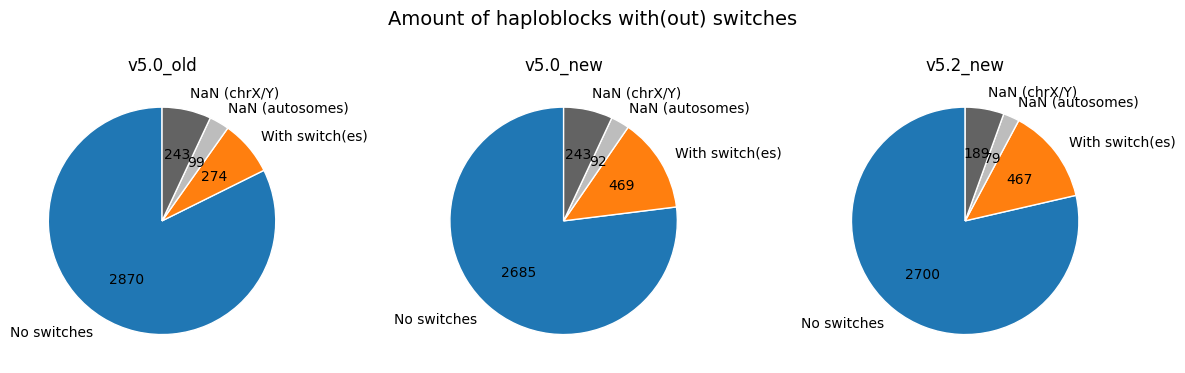

In [7]:

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

def autopct_counts(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{count}"
    return inner_autopct


def piecharts(ax, title, dataf):
    COLOR_MAP = {
        "No switches": "#2077b4",
        "With switch(es)": "#ff7f0f",
        "NaN (autosomes)": "#bdbdbd",
        "NaN (chrX/Y)": "#636363"
    }

    CATEGORY_ORDER = [
        "No switches",
        "With switch(es)",
        "NaN (autosomes)",
        "NaN (chrX/Y)"
    ]

    pieplot = pd.DataFrame(index=dataf.index)

    is_nan = dataf["all_switches"].isna()
    is_xy = dataf["chromosome"].str.contains("chr[XY]$", na=False)

    pieplot["switch_status"] = np.select(
        [
            is_nan & is_xy,
            is_nan & ~is_xy,
            dataf["all_switches"] > 0
        ],
        [
            "NaN (chrX/Y)",
            "NaN (autosomes)",
            "With switch(es)"
        ],
        default="No switches"
    )

    counts = pieplot["switch_status"].value_counts()
    counts = counts.reindex(CATEGORY_ORDER, fill_value=0)

    labels = counts.index
    sizes = counts.values
    colors = [COLOR_MAP[label] for label in labels]

    ax.pie(
        sizes,
        labels=labels,
        colors=colors,
        autopct=autopct_counts(sizes),
        startangle=90,
        labeldistance=1.15,
        pctdistance=0.6,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    ax.set_title(title)

df1 = v5_0_old
df2 = v5_0_new
df3 = v5_2_new

titles = ["v5.0_old", "v5.0_new", "v5.2_new"]

for ax, title, df in zip(axes, titles, [df1, df2, df3]):
    piecharts(ax, title, df)

fig.suptitle(
    "Amount of haploblocks with(out) switches",
    fontsize=14
)
plt.tight_layout()
plt.show()

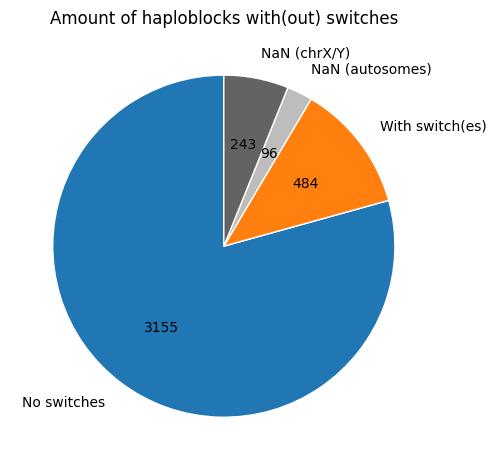

In [4]:
def autopct_counts(values):
    def inner_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f"{count}"
    return inner_autopct


def piecharts(ti, dataf):
    COLOR_MAP = {
        "No switches": "#2077b4",
        "With switch(es)": "#ff7f0f",
        "NaN (autosomes)": "#bdbdbd",
        "NaN (chrX/Y)": "#636363"
    }

    CATEGORY_ORDER = [
        "No switches",
        "With switch(es)",
        "NaN (autosomes)",
        "NaN (chrX/Y)"
    ]

    pieplot = pd.DataFrame(index=dataf.index)

    is_nan = dataf["all_switches"].isna()
    is_xy = dataf["chromosome"].str.contains("chr[XY]$", na=False)

    pieplot["switch_status"] = np.select(
        [
            is_nan & is_xy,
            is_nan & ~is_xy,
            dataf["all_switches"] > 0
        ],
        [
            "NaN (chrX/Y)",
            "NaN (autosomes)",
            "With switch(es)"
        ],
        default="No switches"
    )

    counts = pieplot["switch_status"].value_counts().reindex(CATEGORY_ORDER, fill_value=0)

    plt.pie(
        counts.values,
        labels=counts.index,
        colors=[COLOR_MAP[label] for label in counts.index],
        autopct=autopct_counts(counts.values),
        startangle=90,
        labeldistance=1.15,
        pctdistance=0.6,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )

    plt.title(ti)


df3 = wf_hvar

piecharts("Amount of haploblocks with(out) switches", df3)
plt.tight_layout()
plt.show()


In [33]:
v5_0_old = v5_0_old[v5_0_old["all_switches"].notna()]
v5_0_new = v5_0_new[v5_0_new["all_switches"].notna()]
v5_2_new = v5_2_new[v5_2_new["all_switches"].notna()]

In [34]:
v5_0_old["HB_length"].agg(["mean", "median"])

mean      682466.452926
median    347658.000000
Name: HB_length, dtype: float64

In [35]:
v5_0_new["HB_length"].agg(["mean", "median"])

mean      692062.660431
median    358697.000000
Name: HB_length, dtype: float64

In [9]:
v5_2_new["HB_length"].agg(["mean", "median"])

mean      636969.816594
median    287749.000000
Name: HB_length, dtype: float64

In [44]:
rate = v5_2_new[v5_2_new["PS_tag"] == "chr4_104124010"]["blockwise_hamming_rate"].iloc[0]
if round(rate, 4) == 0.5000:
    print("HIII", rate)

HIII 0.5


In [8]:
try_df = v5_2_new.sort_values("all_switches", ascending=False).head(10)
try_df

,PS,START_HB,END_HB,phased_variants,chromosome,GQ_mean,HB_length,total_VARS,PS_tag,het_variants0,all_switches,all_switch_rate,all_switchflips,all_switchflip_rate,blockwise_hamming_rate,Accuracy,Accuracy_float,flip_amount,switch_amount
2330,53643837,53643837,59819715,6591,chr1,53.267941,6175878,10577,chr1_53643837,6910.0,10.0,0.002330,2/4,0.001398,0.001398,0.9986023759608667%,99.860238,4.0,2.0
351,117641,117641,5845635,7877,chr6,51.206297,5727994,11864,chr6_117641,6587.0,10.0,0.002299,0/5,0.001150,0.001149,0.9988505747126437%,99.885057,5.0,0.0
1354,219022047,219022047,222550921,4503,chr1,52.688430,3528874,6624,chr1_219022047,4106.0,8.0,0.002573,0/4,0.001287,0.001286,0.9987138263665595%,99.871383,4.0,0.0
2931,76319669,76308288,80567397,5229,chr17,51.325110,4259109,9265,chr17_76319669,4726.0,8.0,0.002455,0/4,0.001228,0.001227,0.9987726296409942%,99.877263,4.0,0.0
2722,69180892,69180892,70833395,2130,chr12,53.419249,1652503,2892,chr12_69180892,1988.0,8.0,0.005302,0/4,0.002651,0.002649,0.9973509933774835%,99.735099,4.0,0.0
3050,8130715,8130715,12226844,7341,chr8,48.658357,4096129,11522,chr8_8130715,6342.0,8.0,0.001808,0/4,0.000904,0.000904,0.9990964535803027%,99.909645,4.0,0.0
1251,199711372,199703011,202903446,2823,chr2,51.841304,3200435,4443,chr2_199711372,2618.0,8.0,0.004038,0/4,0.002019,0.002018,0.9979818365287589%,99.798184,4.0,0.0
395,120257013,120257013,121675204,1641,chr1,28.066423,1418191,4037,chr1_120257013,487.0,7.0,0.058333,3/2,0.041667,0.297521,0.7024793388429752%,70.247934,2.0,3.0
2318,53060783,53056069,57092454,7693,chr19,48.155206,4036385,12210,chr19_53060783,5512.0,7.0,0.002316,1/3,0.001324,0.439960,0.5600396956665564%,56.003970,3.0,1.0
988,16514442,16514442,21189725,4060,chr12,54.175369,4675283,10035,chr12_16514442,6021.0,7.0,0.002504,1/3,0.001431,0.072604,0.9273962804005723%,92.739628,3.0,1.0


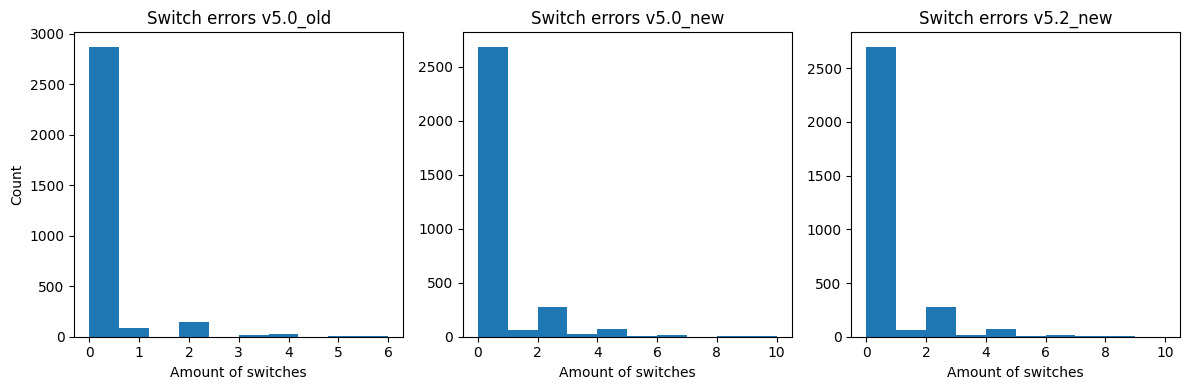

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

axes[0].hist(v5_0_old["all_switches"])
axes[0].set_title("Switch errors v5.0_old")
axes[0].set_xlabel("Amount of switches")
axes[0].set_ylabel("Count")

axes[1].hist(v5_0_new["all_switches"])
axes[1].set_title("Switch errors v5.0_new")
axes[1].set_xlabel("Amount of switches")

axes[2].hist(v5_2_new["all_switches"])
axes[2].set_title("Switch errors v5.2_new")
axes[2].set_xlabel("Amount of switches")

plt.tight_layout()
plt.show()

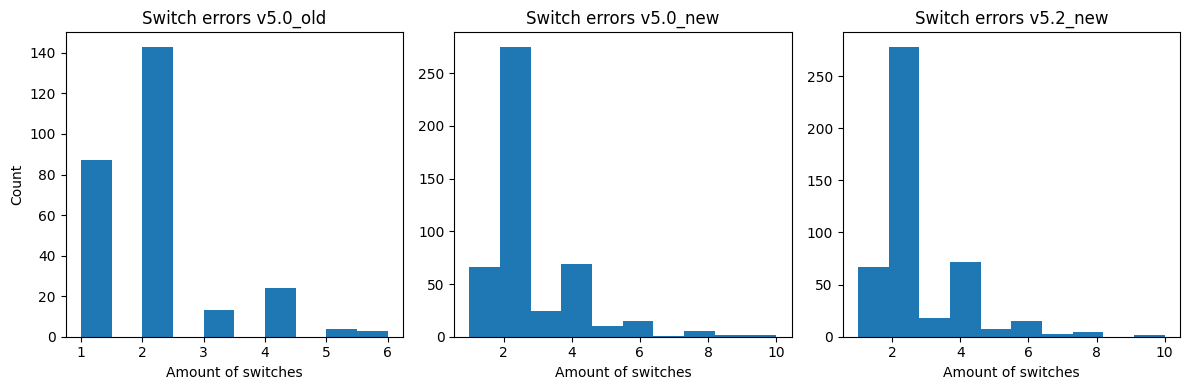

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

df1 = v5_0_old[v5_0_old["all_switches"] >= 1]

df2 = v5_0_new[v5_0_new["all_switches"] >= 1]

df3 = v5_2_new[v5_2_new["all_switches"] >= 1]

axes[0].hist(df1["all_switches"])
axes[0].set_title("Switch errors v5.0_old")
axes[0].set_xlabel("Amount of switches")
axes[0].set_ylabel("Count")

axes[1].hist(df2["all_switches"])
axes[1].set_title("Switch errors v5.0_new")
axes[1].set_xlabel("Amount of switches")

axes[2].hist(df3["all_switches"])
axes[2].set_title("Switch errors v5.2_new")
axes[2].set_xlabel("Amount of switches")


plt.tight_layout()

plt.show()

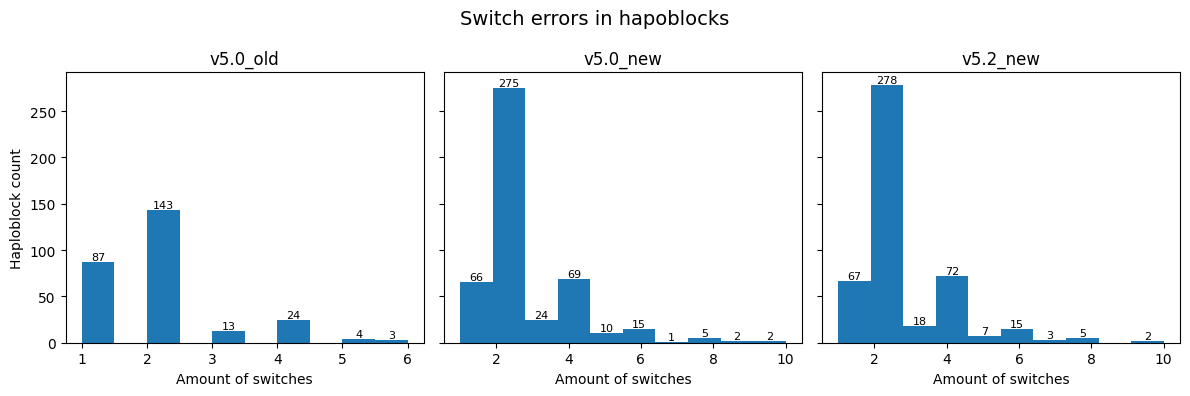

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

df1 = v5_0_old[v5_0_old["all_switches"] >= 1]
df2 = v5_0_new[v5_0_new["all_switches"] >= 1]
df3 = v5_2_new[v5_2_new["all_switches"] >= 1]

datasets = [df1, df2, df3]
titles = ["v5.0_old", "v5.0_new", "v5.2_new"]

for ax, df, title in zip(axes, datasets, titles):
    counts, bins, patches = ax.hist(df["all_switches"])
    ax.set_title(title)
    ax.set_xlabel("Amount of switches")

    # Add counts on top of bars
    for count, patch in zip(counts, patches):
        if count > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2,
                patch.get_height(),
                int(count),
                ha="center",
                va="bottom",
                fontsize=8
            )
fig.suptitle(
    "Switch errors in hapoblocks",
    fontsize=14
)
axes[0].set_ylabel("Haploblock count")

plt.tight_layout()
plt.show()


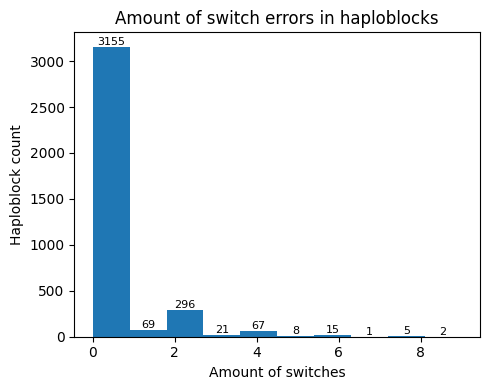

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))

counts, bins, patches = ax.hist(wf_hvar["all_switches"])

ax.set_xlabel("Amount of switches")
ax.set_ylabel("Haploblock count")
ax.set_title("Amount of switch errors in haploblocks")

# Add counts on top of bars
for count, patch in zip(counts, patches):
    if count > 0:
        ax.text(
            patch.get_x() + patch.get_width() / 2,
            patch.get_height(),
            int(count),
            ha="center",
            va="bottom",
            fontsize=8
        )

plt.tight_layout()
plt.show()


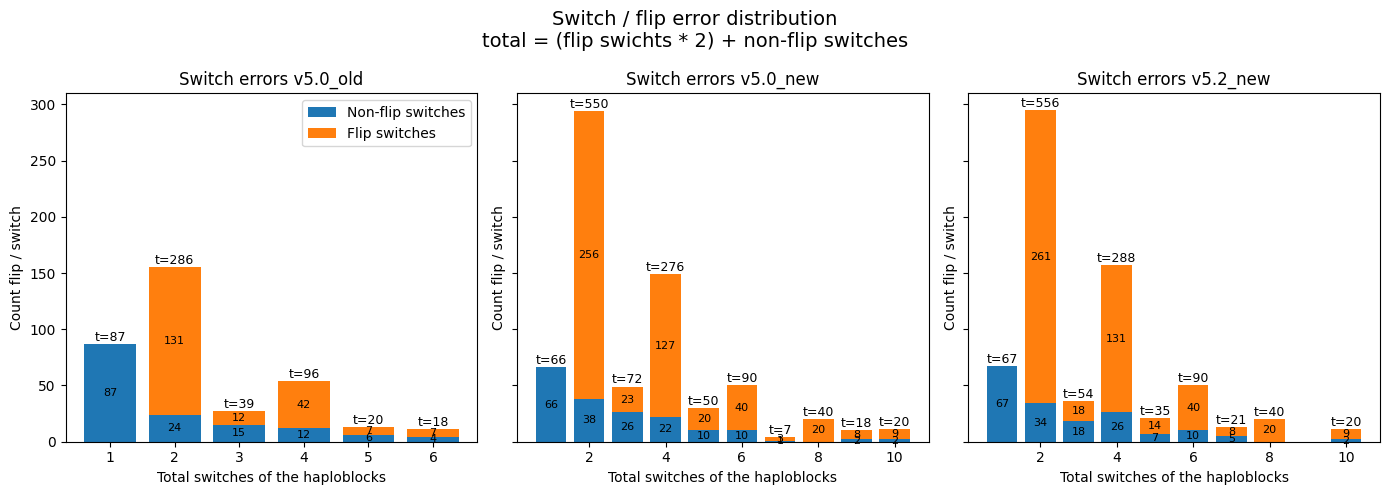

In [12]:
def stacked_switch_plot(ax, df, title):
    df = df.copy()

    # Convert required columns to numeric
    cols = ["all_switches", "flip_amount", "switch_amount"]
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")

    # Filter valid rows
    df = df.dropna(subset=cols)
    df = df[df["all_switches"] >= 1]

    df["total_switches"] = df["all_switches"]
    
    # Aggregate per total switch count
    grouped = (
        df.groupby("total_switches")[["all_switches", "flip_amount", "switch_amount"]]
        .sum()
        .sort_index()
    )
    x = grouped.index
    non_flip = grouped["switch_amount"]
    flip = grouped["flip_amount"]

    # Plot bars
    ax.bar(x, non_flip, label="Non-flip switches")
    ax.bar(x, flip, bottom=non_flip, label="Flip switches")

    # ---- Add labels inside bars ----
    for i, (nf, f) in enumerate(zip(non_flip, flip)):
        if nf > 0:
            ax.text(
                x[i], nf / 2,
                int(nf),
                ha="center", va="center", fontsize=8
            )
        if f > 0:
            ax.text(
                x[i], nf + f / 2,
                int(f),
                ha="center", va="center", fontsize=8
            )
    for i, (tot, nf, f) in enumerate(zip(grouped["all_switches"], non_flip, flip)):
        ax.text(x[i],
            nf + f +0.1, #+ 0.2 * int(tot),  # small offset
            "t="+str(int(tot)),  # this equals all_switches
            ha="center",
            va="bottom",
            fontsize=9)

    ax.set_title(title)
    ax.set_xlabel("Total switches of the haploblocks")
    ax.set_ylabel("Count flip / switch")
    
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

stacked_switch_plot(axes[0], v5_0_old, "Switch errors v5.0_old")
stacked_switch_plot(axes[1], v5_0_new, "Switch errors v5.0_new")
stacked_switch_plot(axes[2], v5_2_new, "Switch errors v5.2_new")
fig.suptitle(
    "Switch / flip error distribution\ntotal = (flip swichts * 2) + non-flip switches",
    fontsize=14
)
axes[0].legend()
plt.tight_layout()
plt.show()

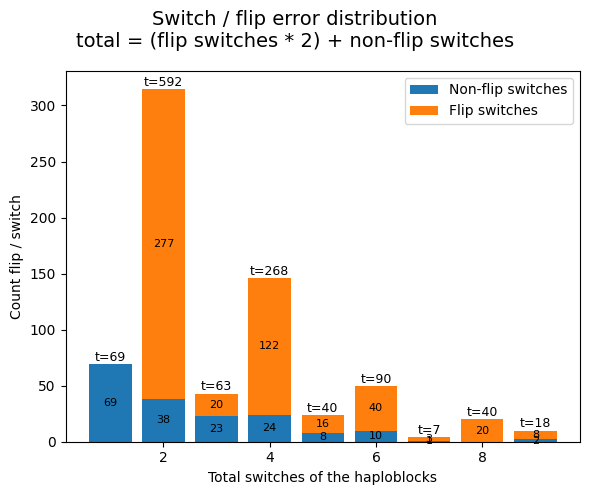

In [8]:
def stacked_switch_plot(ax, df):
    df = df.copy()

    # Convert required columns to numeric
    cols = ["all_switches", "flip_amount", "switch_amount"]
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")

    # Filter valid rows
    df = df.dropna(subset=cols)
    df = df[df["all_switches"] >= 1]

    df["total_switches"] = df["all_switches"]
    
    # Aggregate per total switch count
    grouped = (
        df.groupby("total_switches")[["all_switches", "flip_amount", "switch_amount"]]
        .sum()
        .sort_index()
    )
    x = grouped.index
    non_flip = grouped["switch_amount"]
    flip = grouped["flip_amount"]

    # Plot bars
    ax.bar(x, non_flip, label="Non-flip switches")
    ax.bar(x, flip, bottom=non_flip, label="Flip switches")

    # ---- Add labels inside bars ----
    for i, (nf, f) in enumerate(zip(non_flip, flip)):
        if nf > 0:
            ax.text(
                x[i], nf / 2,
                int(nf),
                ha="center", va="center", fontsize=8
            )
        if f > 0:
            ax.text(
                x[i], nf + f / 2,
                int(f),
                ha="center", va="center", fontsize=8
            )
    for i, (tot, nf, f) in enumerate(zip(grouped["all_switches"], non_flip, flip)):
        ax.text(x[i],
            nf + f +0.1, #+ 0.2 * int(tot),  # small offset
            "t="+str(int(tot)),  # this equals all_switches
            ha="center",
            va="bottom",
            fontsize=9)

    ax.set_xlabel("Total switches of the haploblocks")
    ax.set_ylabel("Count flip / switch")
    
fig, ax = plt.subplots(figsize=(6, 5))

stacked_switch_plot(
    ax,
    wf_hvar
)

fig.suptitle(
    "Switch / flip error distribution\n"
    "total = (flip switches * 2) + non-flip switches",
    fontsize=14
)

ax.legend()
plt.tight_layout()
plt.show()


In [ ]:
wf_hvar[""]

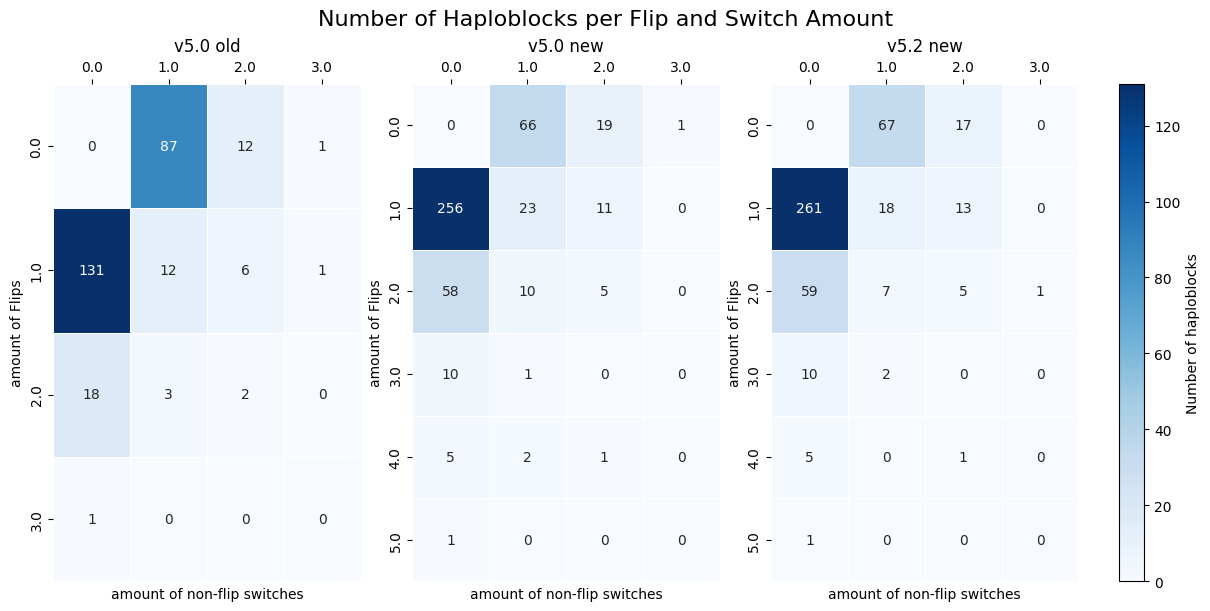

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------
# Prepare dataframes
# -------------------------------------------------

df1 = v5_0_old[v5_0_old["all_switches"] > 0][["all_switches", "flip_amount", "switch_amount"]].copy()

df2 = v5_0_new[v5_0_new["all_switches"] > 0][["all_switches", "flip_amount", "switch_amount"]].copy()

df3 = v5_2_new[v5_2_new["all_switches"] > 0][["all_switches", "flip_amount", "switch_amount"]].copy()

# -------------------------------------------------
# Create figure
# -------------------------------------------------

fig, axes = plt.subplots(1, 3, figsize=(12, 6), constrained_layout=True)

# -------------------------------------------------
# Heatmap function (FIXED)
# -------------------------------------------------

def make_heatmap(ax, df, title):
    # Ensure numeric
    df["flip_amount"] = pd.to_numeric(df["flip_amount"], errors="coerce")
    df["switch_amount"] = pd.to_numeric(df["switch_amount"], errors="coerce")

    # Drop invalid rows
    df = df.dropna(subset=["flip_amount", "switch_amount"])

    # Build count matrix
    heatmap_data = (
        df.groupby(["flip_amount", "switch_amount"])
          .size()
          .unstack(fill_value=0)
          .sort_index()
    )

    # Plot into provided axis
    sns.heatmap(
        heatmap_data,
        ax=ax,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        linewidths=0.5
    )

    ax.set_title(title)
    ax.set_xlabel("amount of non-flip switches")
    ax.set_ylabel("amount of Flips")
    ax.xaxis.tick_top()


    return heatmap_data

# -------------------------------------------------
# Draw heatmaps
# -------------------------------------------------

hm1 = make_heatmap(axes[0], df1, "v5.0 old")
hm2 = make_heatmap(axes[1], df2, "v5.0 new")
hm3 = make_heatmap(axes[2], df3, "v5.2 new")

# -------------------------------------------------
# Shared colorbar
# -------------------------------------------------

cbar = fig.colorbar(
    axes[0].collections[0],
    ax=axes,
    orientation="vertical",
    location="right",
    fraction=0.03,
    pad=0.04
)
cbar.set_label("Number of haploblocks")

# cbar = fig.colorbar(
#     ac,
#     ax=axes,
#     location="right",
#     pad=0.02,
#     shrink=0.9
# )

# -------------------------------------------------
# Final layout
# -------------------------------------------------

plt.suptitle("Number of Haploblocks per Flip and Switch Amount", fontsize=16)
plt.show()


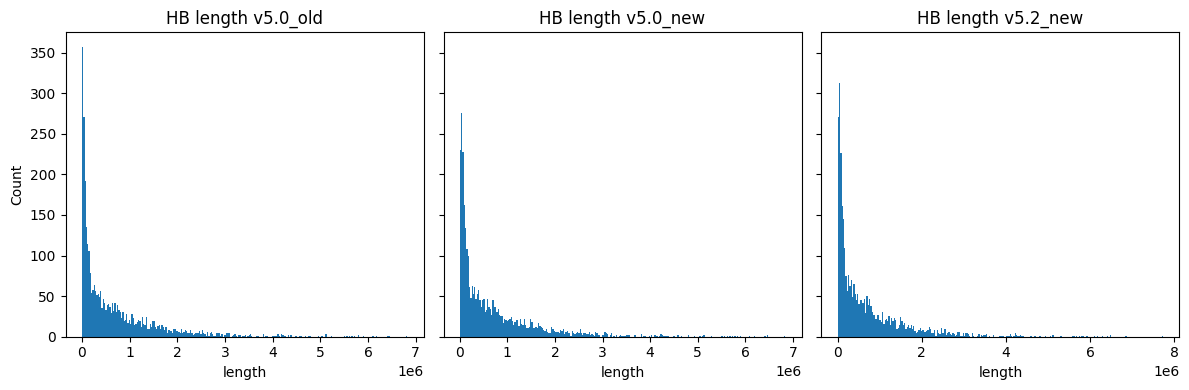

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

df1 = v5_0_old
df2 = v5_0_new
df3 = v5_2_new

datasets = [df1, df2, df3]
titles = ["HB length v5.0_old", "HB length v5.0_new", "HB length v5.2_new"]

for ax, df, title in zip(axes, datasets, titles):
    counts, bins, patches = ax.hist(df["HB_length"], bins=250)
    ax.set_title(title)
    ax.set_xlabel("length")

axes[0].set_ylabel("Count")

plt.tight_layout()
plt.show()

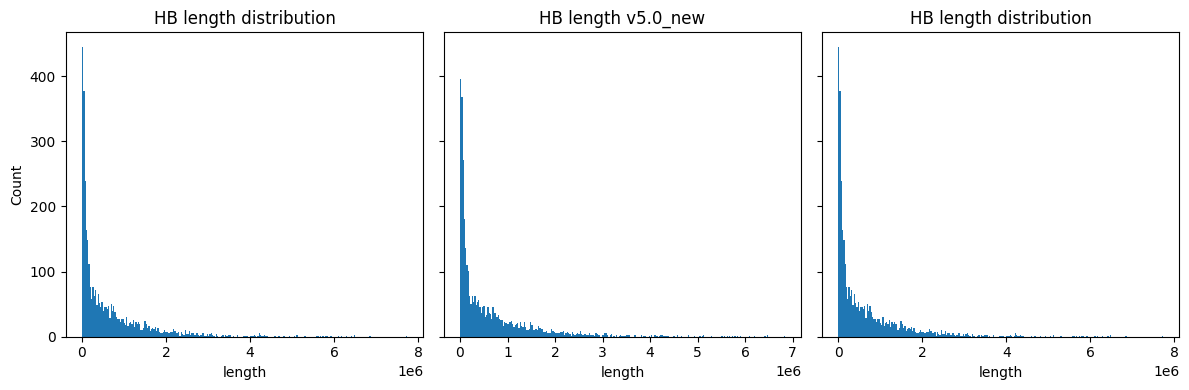

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

df1 = v5_0_old
df2 = v5_0_new
df3 = v5_2_new

datasets = [df3, df2, df3]
titles = ["HB length distribution", "HB length v5.0_new", "HB length distribution"]

for ax, df, title in zip(axes, datasets, titles):
    counts, bins, patches = ax.hist(df["HB_length"], bins=250)
    ax.set_title(title)
    ax.set_xlabel("length")

axes[0].set_ylabel("Count")

plt.tight_layout()
plt.show()

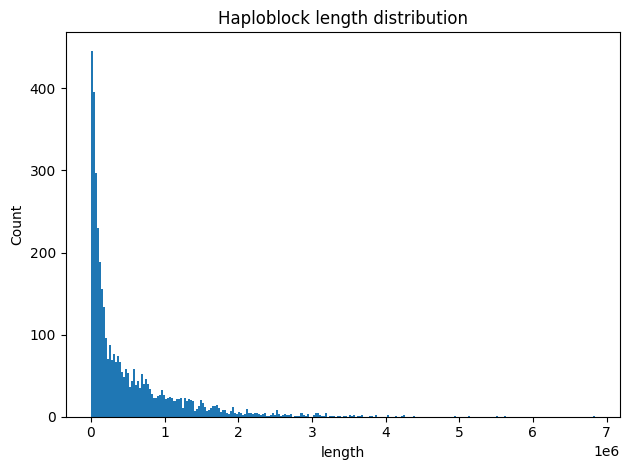

In [11]:
#fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

plt.hist(wf_hvar["HB_length"], bins=250)
plt.title("Haploblock length distribution")
plt.xlabel("length")

plt.ylabel("Count")

plt.tight_layout()
plt.show()

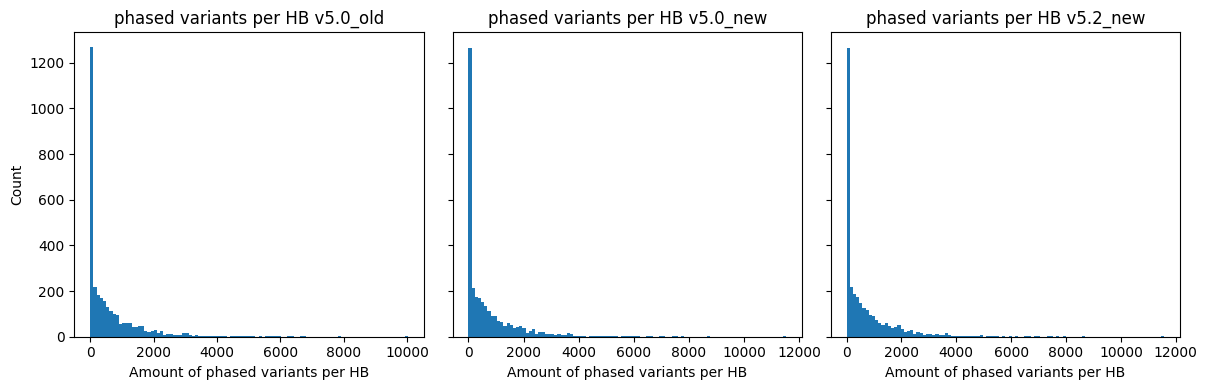

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

df1 = v5_0_old
df2 = v5_0_new
df3 = v5_2_new

datasets = [df1, df2, df3]
titles = ["phased variants per HB v5.0_old", "phased variants per HB v5.0_new", "phased variants per HB v5.2_new"]

for ax, df, title in zip(axes, datasets, titles):
    counts, bins, patches = ax.hist(df["phased_variants"], bins=100)
    ax.set_title(title)
    ax.set_xlabel("Amount of phased variants per HB")

axes[0].set_ylabel("Count")

plt.tight_layout()
plt.show()

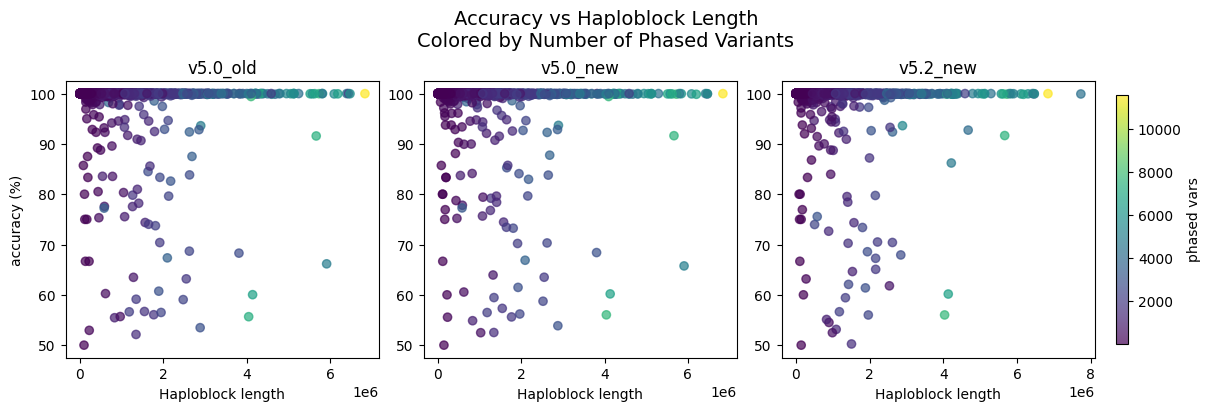

In [16]:

df1 = v5_0_old
df2 = v5_0_new
df3 = v5_2_new

fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

datasets = [df1, df2, df3]
titles = ["v5.0_old", "v5.0_new", "v5.2_new"]

for ax, df, title in zip(axes, datasets, titles):
    ac = ax.scatter(
        df['HB_length'],
        df['Accuracy_float'],
        c=df['phased_variants'],
        cmap='viridis',
        alpha=0.7
    )
    ax.set_title(title)

    ax.set_xlabel('Haploblock length')
axes[0].set_ylabel('accuracy (%)')
# Main title (figure-level)
fig.suptitle(
    "Accuracy vs Haploblock Length\nColored by Number of Phased Variants",
    fontsize=14
)

cbar = fig.colorbar(
    ac,
    ax=axes,
    location="right",
    pad=0.02,
    shrink=0.9
)
cbar.set_label('phased vars')

#plt.tight_layout()
plt.show()


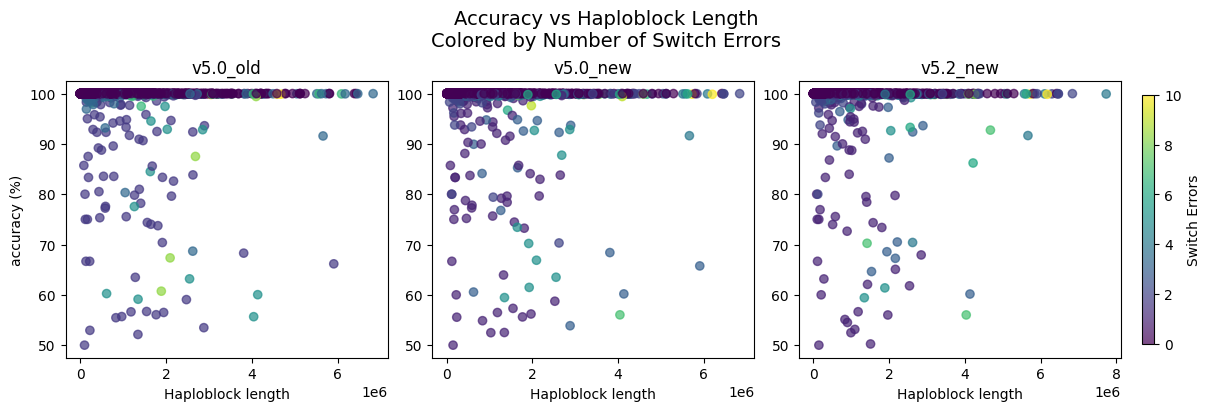

In [17]:

df1 = v5_0_old
df2 = v5_0_new
df3 = v5_2_new

fig, axes = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

datasets = [df1, df2, df3]
titles = ["v5.0_old", "v5.0_new", "v5.2_new"]

for ax, df, title in zip(axes, datasets, titles):
    ac = ax.scatter(
        df['HB_length'],
        df['Accuracy_float'],
        c=df['all_switches'],
        cmap='viridis',
        alpha=0.7
    )
    ax.set_title(title)

    ax.set_xlabel('Haploblock length')
axes[0].set_ylabel('accuracy (%)')
# Main title (figure-level)
fig.suptitle(
    "Accuracy vs Haploblock Length\nColored by Number of Switch Errors",
    fontsize=14
)

cbar = fig.colorbar(
    ac,
    ax=axes,
    location="right",
    pad=0.02,
    shrink=0.9
)
cbar.set_label('Switch Errors')

#plt.tight_layout()
plt.show()


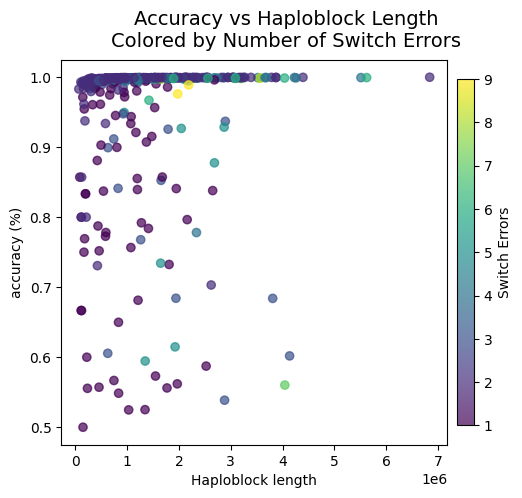

In [9]:


df3 = wf_hvar[wf_hvar["all_switches"] >= 1]
fig, ax = plt.subplots(figsize=(6, 5))

ac = ax.scatter(
    df3['HB_length'],
    df3['Accuracy_float'],
    c=df3['all_switches'],
    cmap='viridis',
    alpha=0.7
)

ax.set_xlabel('Haploblock length')
ax.set_ylabel('accuracy (%)')
# Main title (figure-level)
fig.suptitle(
    "Accuracy vs Haploblock Length\nColored by Number of Switch Errors",
    fontsize=14
)

cbar = fig.colorbar(
    ac,
    ax=ax,
    location="right",
    pad=0.02,
    shrink=0.9
)
cbar.set_label('Switch Errors')

#plt.tight_layout()
plt.show()


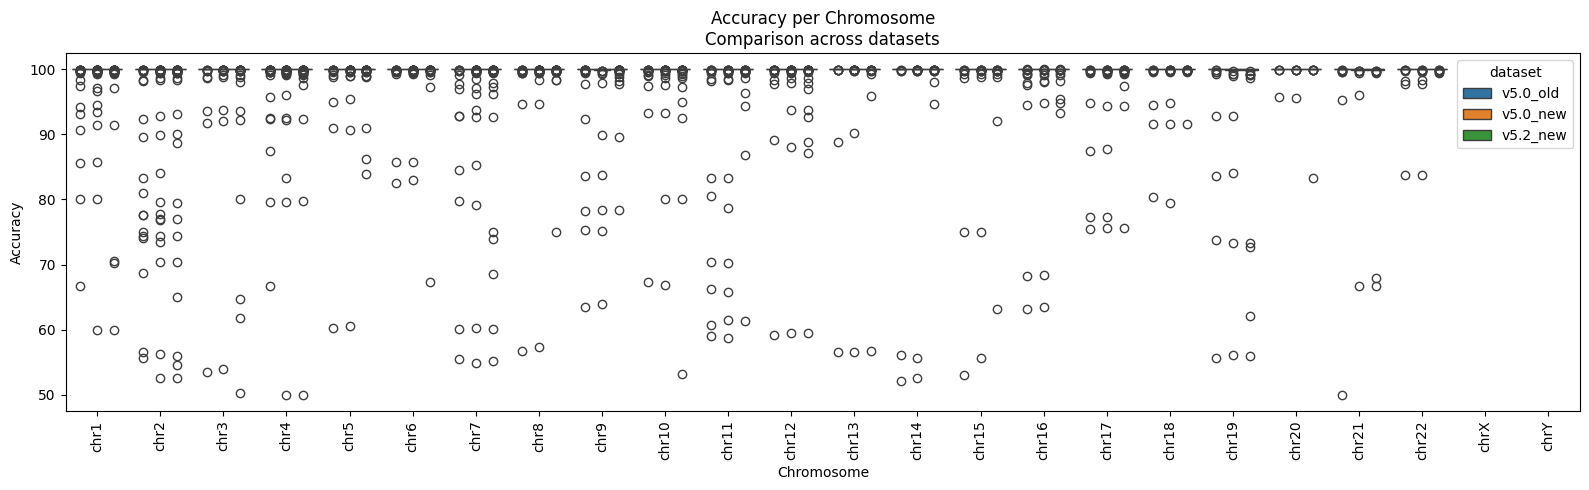

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

chrom_order = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]

# Add dataset labels
df1 = v5_0_old.copy()
df1["dataset"] = "v5.0_old"

df2 = v5_0_new.copy()
df2["dataset"] = "v5.0_new"

df3 = v5_2_new.copy()
df3["dataset"] = "v5.2_new"

# Combine
df_all = pd.concat([df1, df2, df3], ignore_index=True)

plt.figure(figsize=(16, 5))

sns.boxplot(
    data=df_all,
    x="chromosome",
    y="Accuracy_float",
    hue="dataset",
    order=chrom_order
)

plt.xlabel("Chromosome")
plt.ylabel("Accuracy")
plt.title("Accuracy per Chromosome\nComparison across datasets")

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [19]:

import seaborn as sns

df['Accuracy_float'] = (
    df['Accuracy']
    .str.rstrip('%')
    .astype(float)
)


sns.relplot(
    data=df,
    x='HB_length',
    y='informative_variants',
    hue='Accuracy_float',
    col='chromosome',
    col_wrap=5,
    palette='viridis',
    alpha=0.7,
    kind='scatter'
)


NameError: name 'switches' is not defined

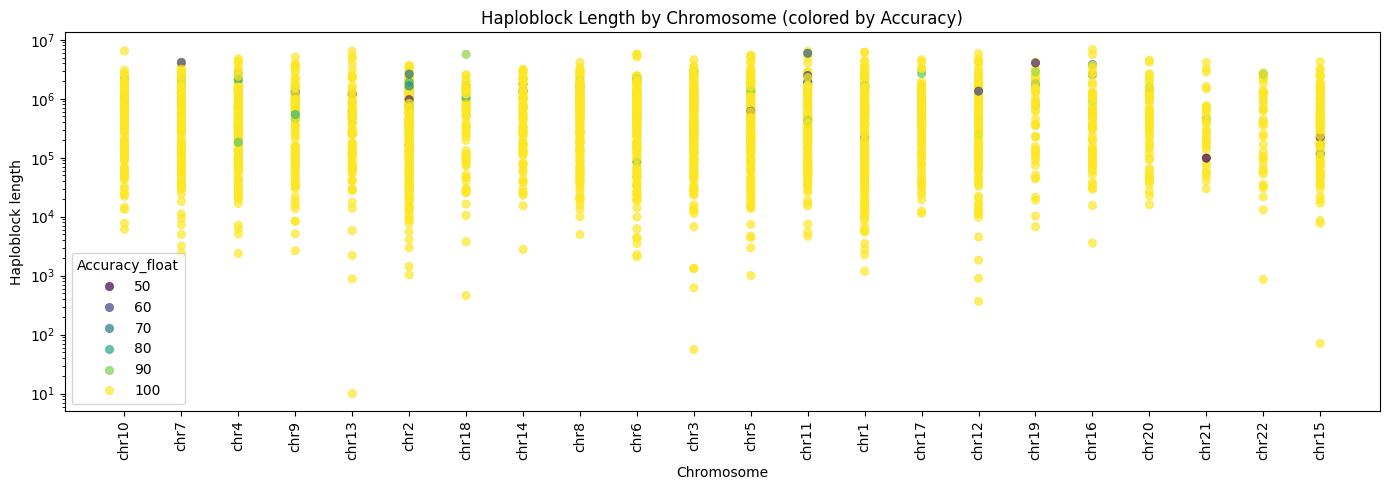

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df1
plt.figure(figsize=(14, 5))

sns.scatterplot( # maak er een boxplot van
    data=df,
    x='chromosome',
    y='HB_length',
    hue='Accuracy_float',
    palette='viridis',
    alpha=0.7,
    edgecolor=None
)

plt.yscale('log')
plt.xlabel('Chromosome')
plt.ylabel('Haploblock length')
plt.title('Haploblock Length by Chromosome (colored by Accuracy)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


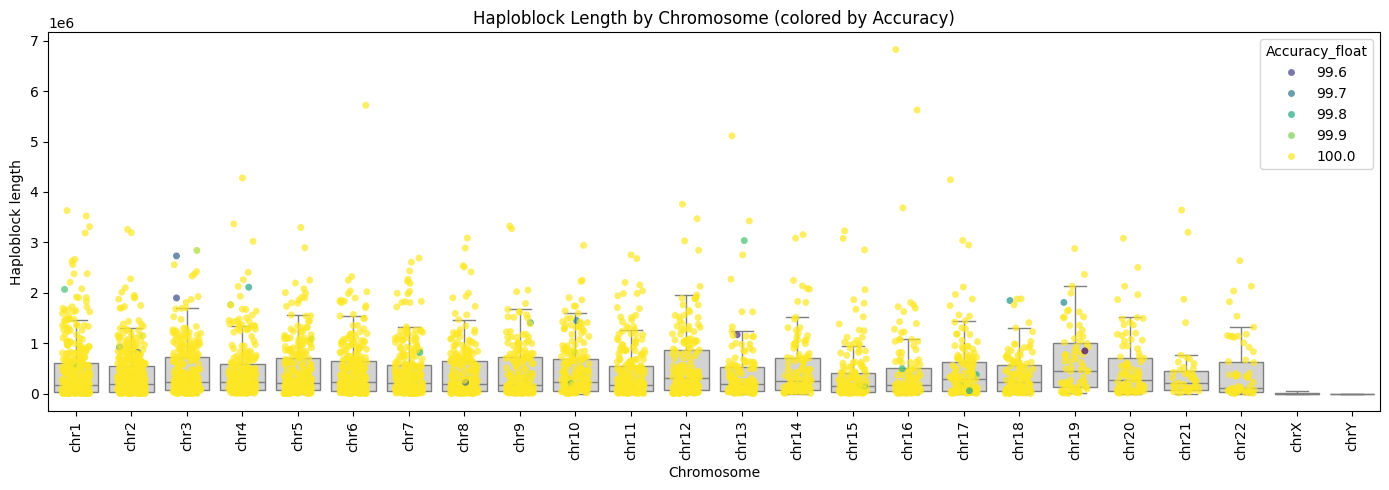

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df = switches
chrom_order = [f'chr{i}' for i in range(1, 23)] + ['chrX', 'chrY']

plt.figure(figsize=(14, 5))

# Boxplot
sns.boxplot(
    data=df,
    x='chromosome',
    y='HB_length',
    order=chrom_order,
    color='lightgray',
    showfliers=False
)

# Scatter (jittered points on top)
sns.stripplot(
    data=df,
    x='chromosome',
    y='HB_length',
    order=chrom_order,
    hue='Accuracy_float',
    palette='viridis',
    jitter=0.25,
    alpha=0.7,
    dodge=False
)

#plt.yscale('log')
plt.xlabel('Chromosome')
plt.ylabel('Haploblock length')
plt.title('Haploblock Length by Chromosome (colored by Accuracy)')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
